In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib seaborn  pandas scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Fetching the dataset from UCI Machine Learning Repository

from ucimlrepo import fetch_ucirepo
import pickle

In [6]:
# Fetch dataset (ID 235 is for "Individual household electric power consumption")
dataset = fetch_ucirepo(id=235)

In [7]:
# Combine features and targets into a single DataFrame
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)

In [8]:
dataset.data.features

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [9]:
print(dataset.data.targets)


None


In [10]:
# Display the first few rows
print(df.head())

# Optional: Print metadata and variable info
# print(dataset.metadata)
# print(dataset.variables)

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [12]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [13]:
df['Global_active_power'].head(20)

0     4.216
1     5.360
2     5.374
3     5.388
4     3.666
5     3.520
6     3.702
7     3.700
8     3.668
9     3.662
10    4.448
11    5.412
12    5.224
13    5.268
14    4.054
15    3.384
16    3.270
17    3.430
18    3.266
19    3.728
Name: Global_active_power, dtype: object

In [14]:
# coverting object to float, replacing '?' with NaN first
df = df.replace('?', np.nan)
df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] = df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)
df['Sub_metering_3'] = df['Sub_metering_3'].astype(float)

In [15]:
# Convert Date and Time columns to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))


In [16]:
df['hour'] = df['DateTime'].dt.hour
df['day'] = df['DateTime'].dt.day
df['weekday'] = df['DateTime'].dt.weekday
df['month'] = df['DateTime'].dt.month

In [17]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'DateTime', 'hour', 'day', 'weekday', 'month'],
      dtype='object')

In [18]:
df['Total_sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

In [19]:
df.head(20)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,hour,day,weekday,month,Total_sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,17,16,5,12,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,17,16,5,12,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,17,16,5,12,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,17,16,5,12,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,17,16,5,12,18.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006-12-16 17:29:00,17,16,5,12,19.0
6,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006-12-16 17:30:00,17,16,5,12,18.0
7,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006-12-16 17:31:00,17,16,5,12,18.0
8,2006-12-16,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0,2006-12-16 17:32:00,17,16,5,12,18.0
9,2006-12-16,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0,2006-12-16 17:33:00,17,16,5,12,18.0


In [20]:
# Drop original Date and Time columns if needed
df1 = df.drop(['Date', 'Time', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], axis=1)


In [21]:
df1.head(20)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,DateTime,hour,day,weekday,month,Total_sub_metering
0,4.216,0.418,234.84,18.4,2006-12-16 17:24:00,17,16,5,12,18.0
1,5.360,0.436,233.63,23.0,2006-12-16 17:25:00,17,16,5,12,17.0
2,5.374,0.498,233.29,23.0,2006-12-16 17:26:00,17,16,5,12,19.0
3,5.388,0.502,233.74,23.0,2006-12-16 17:27:00,17,16,5,12,18.0
4,3.666,0.528,235.68,15.8,2006-12-16 17:28:00,17,16,5,12,18.0
5,3.520,0.522,235.02,15.0,2006-12-16 17:29:00,17,16,5,12,19.0
6,3.702,0.520,235.09,15.8,2006-12-16 17:30:00,17,16,5,12,18.0
7,3.700,0.520,235.22,15.8,2006-12-16 17:31:00,17,16,5,12,18.0
8,3.668,0.510,233.99,15.8,2006-12-16 17:32:00,17,16,5,12,18.0
9,3.662,0.510,233.86,15.8,2006-12-16 17:33:00,17,16,5,12,18.0


In [22]:
print(f"Hour: {np.sort(df1['hour'].unique())[0::]}")
print(f"Day: {np.sort(df1['day'].unique())[0::]}")
print(f"Weekday: {np.sort(df1['weekday'].unique())[0::]}")
print(f"Month: {np.sort(df1['month'].unique())[0::]}")


Hour: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Weekday: [0 1 2 3 4 5 6]
Month: [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   DateTime               datetime64[ns]
 5   hour                   int32         
 6   day                    int32         
 7   weekday                int32         
 8   month                  int32         
 9   Total_sub_metering     float64       
dtypes: datetime64[ns](1), float64(5), int32(4)
memory usage: 126.7 MB


## Basix explorations

In [24]:
df1.shape

(2075259, 10)

In [25]:
df1['DateTime'].isnull().sum()

np.int64(0)

In [26]:
df1.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,DateTime,hour,day,weekday,month,Total_sub_metering
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,2008-12-06 07:12:59.999994112,1.150076e+01,1.577363e+01,2.998909e+00,6.450359e+00,8.878891e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,2006-12-16 17:24:00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,2007-12-12 00:18:30,6.000000e+00,8.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,2008-12-06 07:13:00,1.200000e+01,1.600000e+01,3.000000e+00,6.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,2009-12-01 14:07:30,1.800000e+01,2.300000e+01,5.000000e+00,9.000000e+00,1.800000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,2010-11-26 21:02:00,2.300000e+01,3.100000e+01,6.000000e+00,1.200000e+01,1.340000e+02
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,NaN,6.922227e+00,8.787773e+00,2.000064e+00,3.415762e+00,1.286300e+01


In [27]:
df1.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
DateTime                     0
hour                         0
day                          0
weekday                      0
month                        0
Total_sub_metering       25979
dtype: int64

In [28]:
#drop numll values in the dataset
df1 = df1.dropna()
# Check the shape after dropping null values
df1.shape

(2049280, 10)

In [29]:
df1.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
DateTime                 0
hour                     0
day                      0
weekday                  0
month                    0
Total_sub_metering       0
dtype: int64

In [30]:
# Daily average power usage
df1['daily_avg_power'] = df1.groupby('day')['Global_active_power'].transform('mean')


In [31]:
# # 1-hour rolling average (assuming data is per minute)
df1['rolling_1h'] = df1['Global_active_power'].rolling(window=60, min_periods=1).mean()

In [32]:
# 3-hour rolling average
df1['rolling_3h'] = df1['Global_active_power'].rolling(window=180, min_periods=1).mean()

## Visvual Explortation :

In [33]:
df1.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'DateTime', 'hour', 'day', 'weekday', 'month',
       'Total_sub_metering', 'daily_avg_power', 'rolling_1h', 'rolling_3h'],
      dtype='object')

In [34]:
numeric_columns = df1.select_dtypes(include=[float]).columns.tolist()

print("Numeric columns:", numeric_columns)

Numeric columns: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Total_sub_metering', 'daily_avg_power', 'rolling_1h', 'rolling_3h']


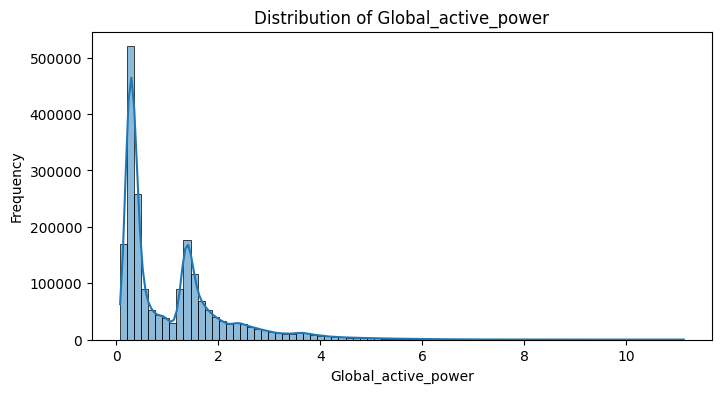

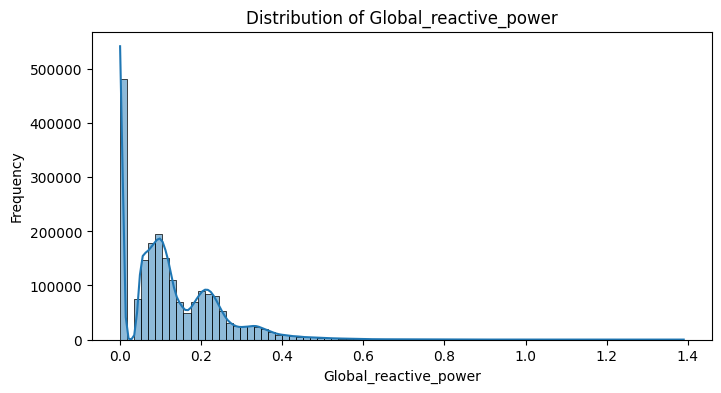

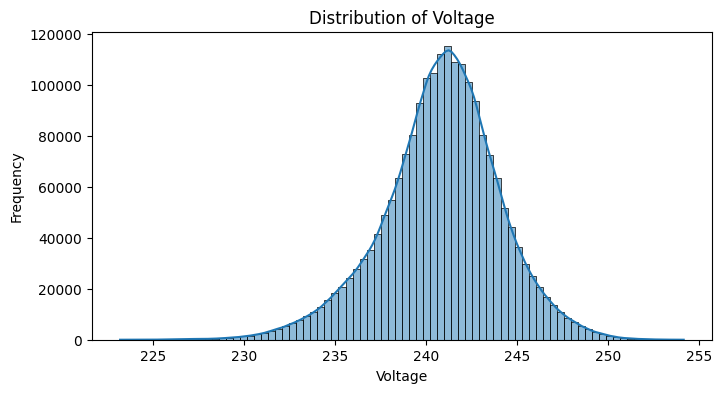

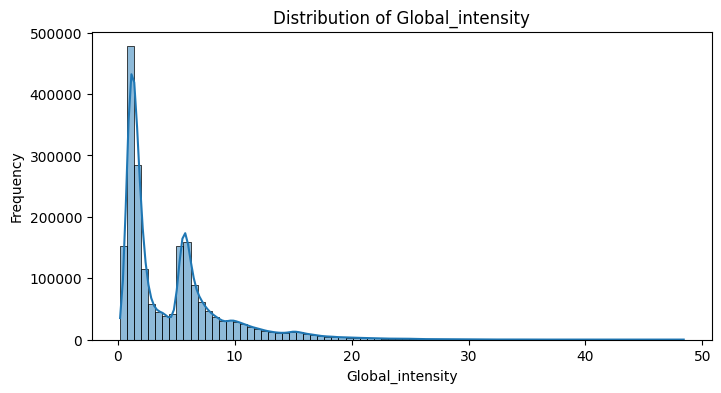

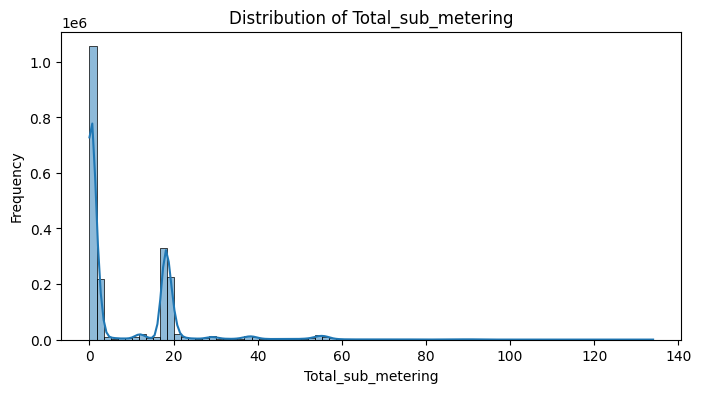

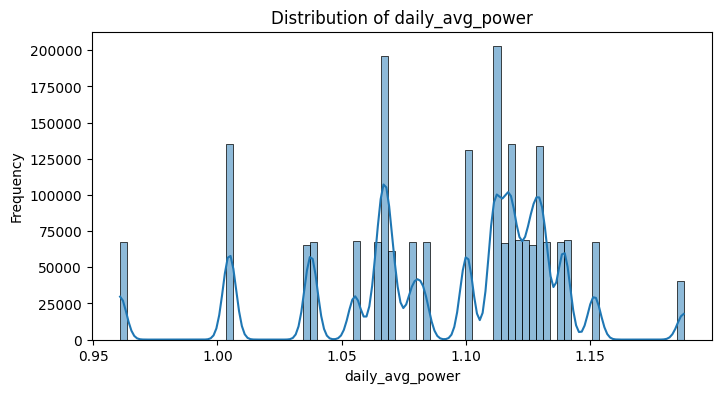

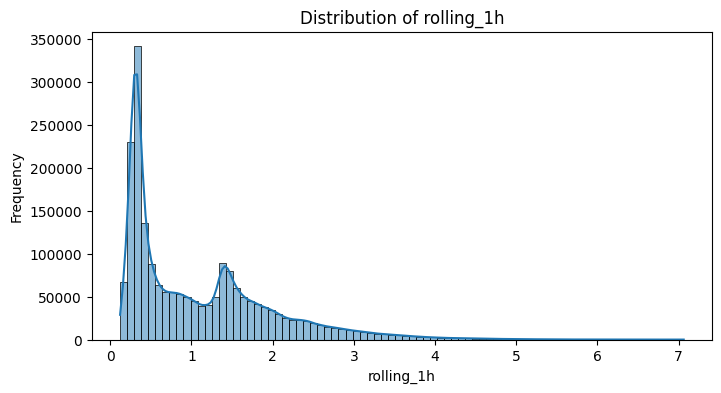

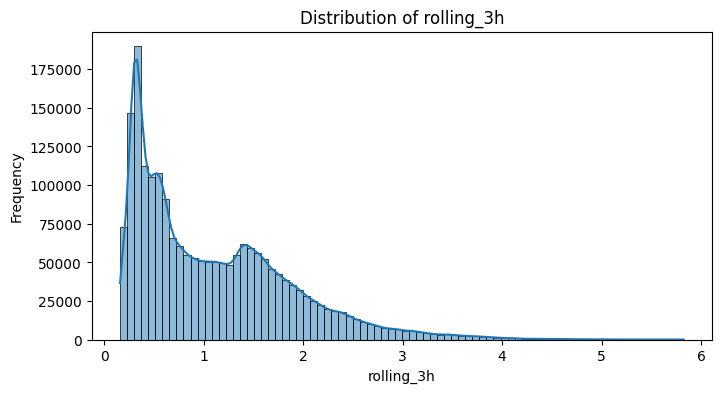

In [35]:
# Plot distribution for all numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df1[col], bins=80, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [36]:
# from above all charts we can see that the data is not normally distributed
# patricualrly Global_active_power is right skewed, other columns are also skewed
# we can use log transformation to make it more normally distributed

In [37]:
df1[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Total_sub_metering']].skew().sort_values(ascending=False)

Total_sub_metering       2.228822
Global_intensity         1.849100
Global_active_power      1.786233
Global_reactive_power    1.261914
Voltage                 -0.326665
dtype: float64

In [38]:
from scipy.stats import skew, kurtosis

# Only numeric features
#numeric_cols = df1.select_dtypes(include=['float32', 'float64', 'int']).columns

print("Skewness and Kurtosis of numeric features:")
for col in numeric_columns:
    print(f"{col}: Skewness = {skew(df1[col].dropna()):.2f}, Kurtosis = {kurtosis(df1[col].dropna()):.2f}")


Skewness and Kurtosis of numeric features:
Global_active_power: Skewness = 1.79, Kurtosis = 4.22
Global_reactive_power: Skewness = 1.26, Kurtosis = 2.61
Voltage: Skewness = -0.33, Kurtosis = 0.72
Global_intensity: Skewness = 1.85, Kurtosis = 4.60
Total_sub_metering: Skewness = 2.23, Kurtosis = 7.34
daily_avg_power: Skewness = -0.83, Kurtosis = 0.44
rolling_1h: Skewness = 1.29, Kurtosis = 1.76
rolling_3h: Skewness = 1.10, Kurtosis = 1.14


In [39]:
from scipy.stats import skew

# Check skewness
print(df1[numeric_columns].skew())

# Apply log1p transformation to highly skewed columns
for col in numeric_columns:
	if abs(df1[col].skew()) > 1:
		df1[col] = np.log1p(df1[col])

Global_active_power      1.786233
Global_reactive_power    1.261914
Voltage                 -0.326665
Global_intensity         1.849100
Total_sub_metering       2.228822
daily_avg_power         -0.831894
rolling_1h               1.293448
rolling_3h               1.100521
dtype: float64


In [ ]:
# Thumb rule for skewness:
# - If skewness is between -0.5 and 0.5: Data is approximately symmetric.
# - If skewness is between -1 and -0.5 or 0.5 and 1: Data is moderately skewed.
# - If skewness is less than -1 or greater than 1: Data is highly skewed.

print("""
Thumb rule for skewness:
- Skewness between -0.5 and 0.5: approximately symmetric
- Skewness between -1 and -0.5 or 0.5 and 1: moderately skewed
- Skewness < -1 or > 1: highly skewed
""")

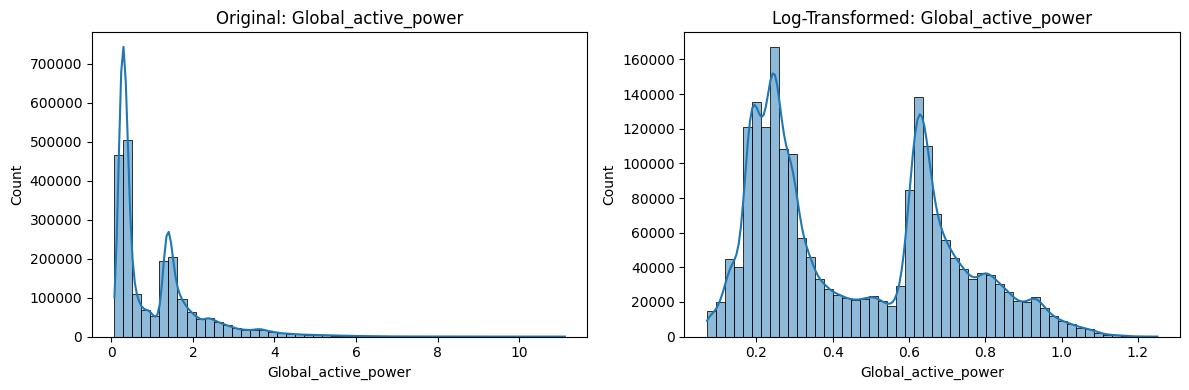

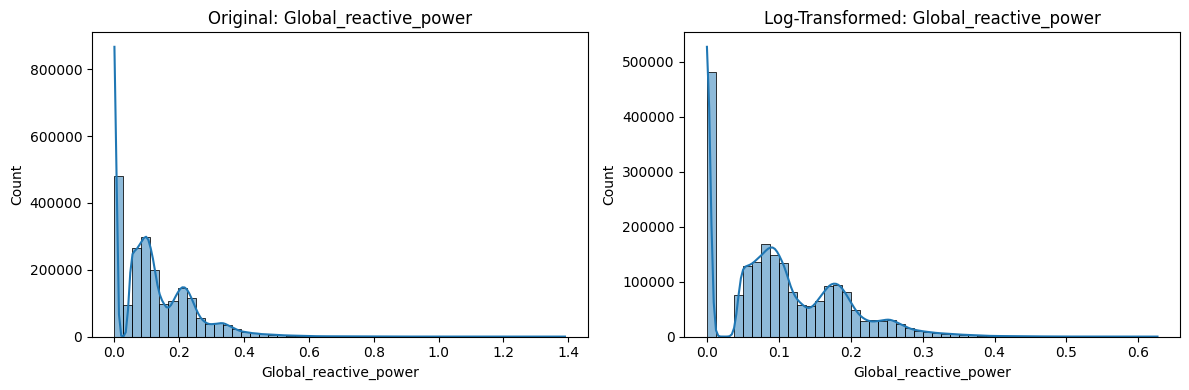

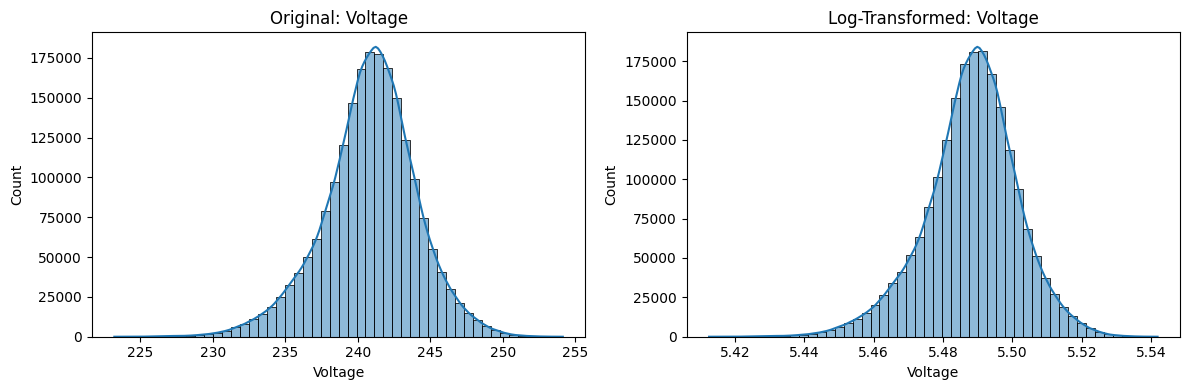

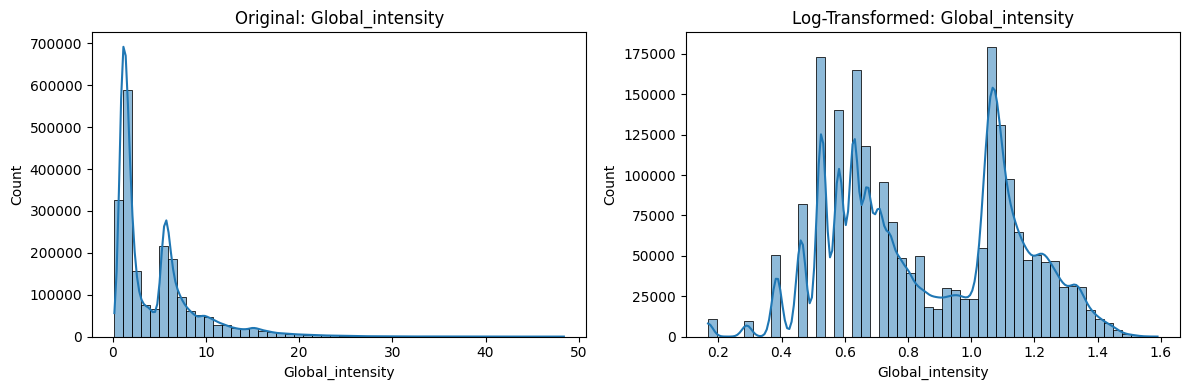

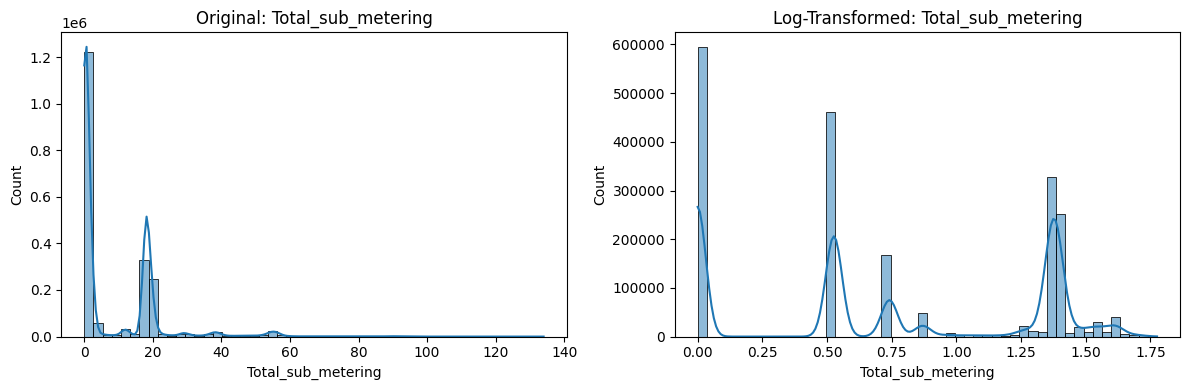

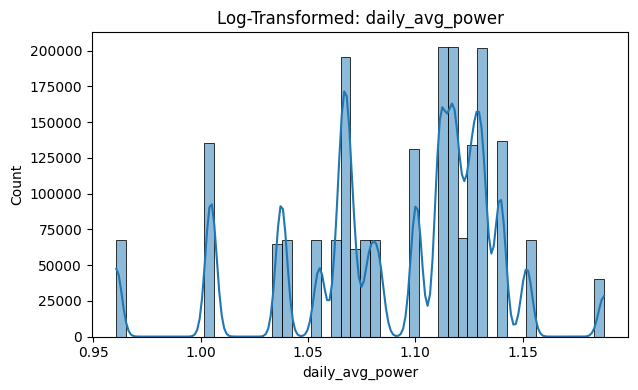

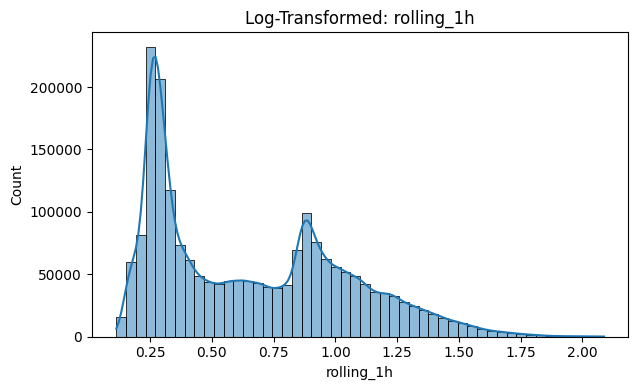

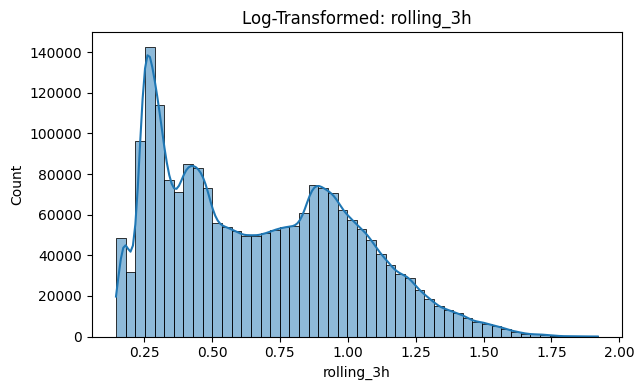

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_columns:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    # Only plot from df if the column exists
    if col in df.columns:
        sns.histplot(df[col], bins=50, kde=True, ax=axs[0])
        axs[0].set_title(f"Original: {col}")
    else:
        axs[0].set_visible(False)
    
    sns.histplot(df1[col], bins=50, kde=True, ax=axs[1])
    axs[1].set_title(f"Log-Transformed: {col}")
    
    plt.tight_layout()
    plt.show()


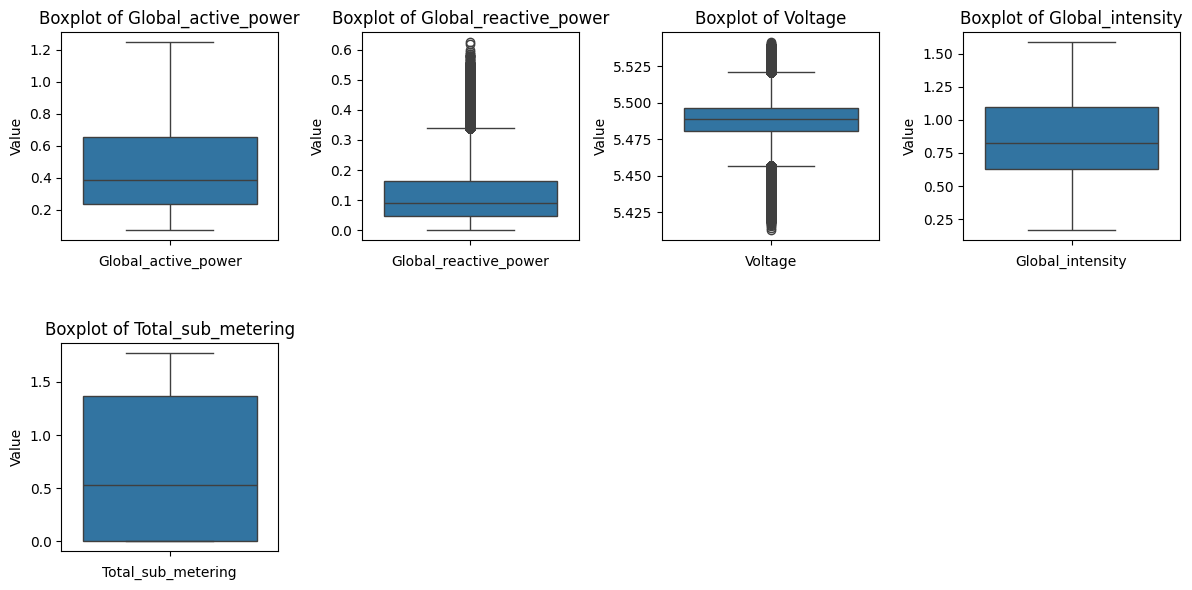

In [44]:
#  Plot boxplots for all numeric columns
plt.figure(figsize=(12, 6))
for col in skewed_features:
    subplot = plt.subplot(2, 4, numeric_columns.index(col) + 1)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    sns.boxplot(data=df1[col])
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

In [45]:
from sklearn.feature_selection import VarianceThreshold

# Optional: remove transformed columns that became near-constant
selector = VarianceThreshold(threshold=0.01)
selector.fit(df1[numeric_columns])

retained_columns = df1[numeric_columns].columns[selector.get_support()]
removed_columns = set(numeric_columns) - set(retained_columns)
print("✅ Retained:", retained_columns.tolist())
print("❌ Removed due to low variance:", list(removed_columns))


✅ Retained: ['Global_active_power', 'Global_intensity', 'Total_sub_metering', 'rolling_1h', 'rolling_3h']
❌ Removed due to low variance: ['daily_avg_power', 'Voltage', 'Global_reactive_power']


In [141]:
# coverting DateTime to datetime format
df1['month'] = df1['DateTime'].dt.month
df1['year'] = df1['DateTime'].dt.year
df1['day'] = df1['DateTime'].dt.day
df1['hour'] = df1['DateTime'].dt.hour
df1['weekday'] = df1['DateTime'].dt.weekday

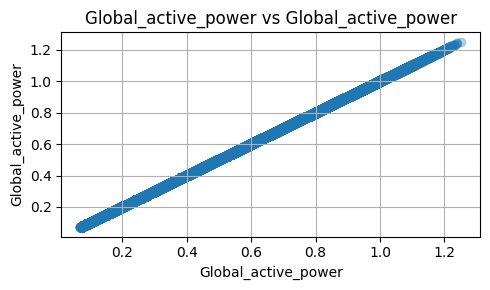

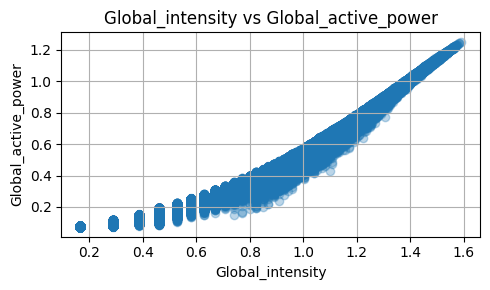

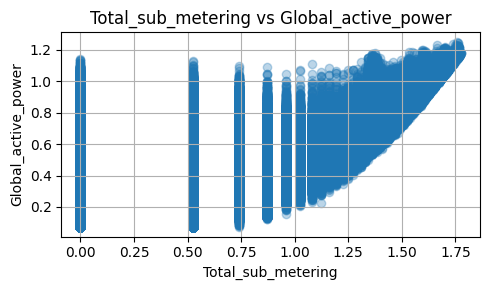

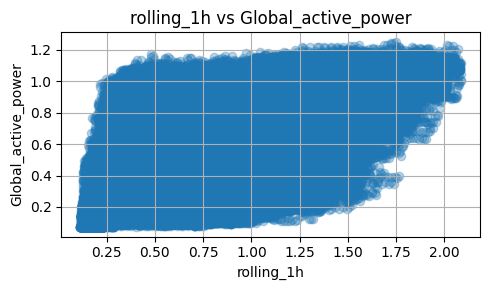

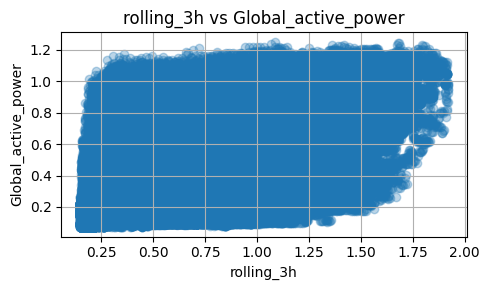

In [55]:
import matplotlib.pyplot as plt

target = 'Global_active_power'
for col in retained_columns:
    plt.figure(figsize=(5, 3))
    plt.scatter(df1[col], df1[target], alpha=0.3)
    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [57]:
df1.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'DateTime', 'hour', 'day', 'weekday', 'month',
       'Total_sub_metering', 'daily_avg_power', 'rolling_1h', 'rolling_3h'],
      dtype='object')

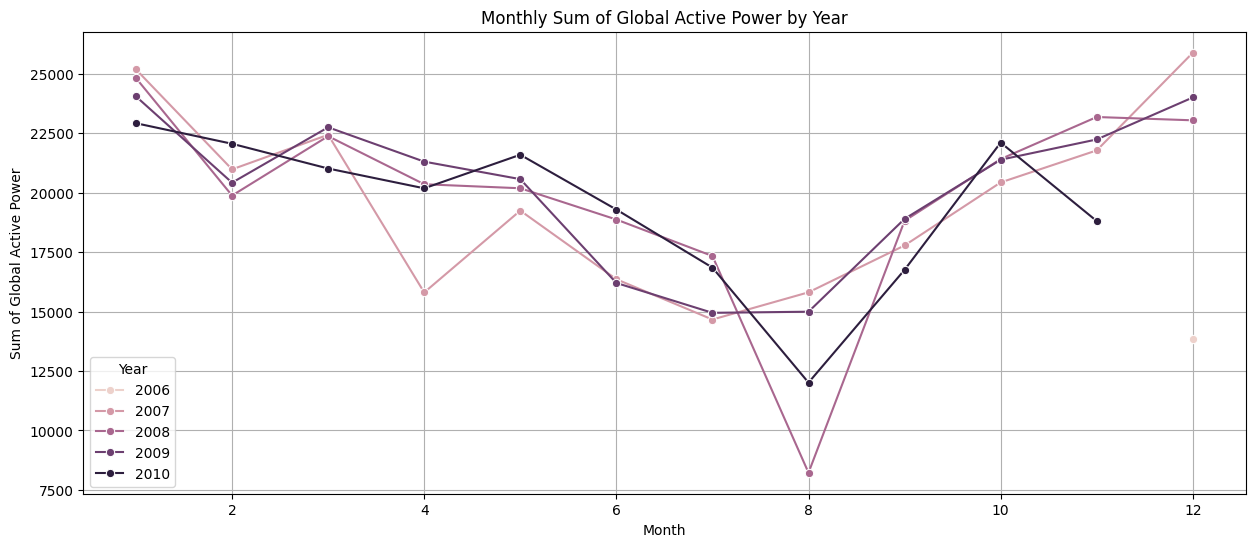

In [58]:
# Ensure 'year' column exists
df1['year'] = df1['DateTime'].dt.year

# Continue the monthly sum line chart for Global Active Power, but now by both year and month
monthly_power_sum_year = df1.groupby(['year', 'month'])['Global_active_power'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_power_sum_year, x='month', y='Global_active_power', hue='year', marker='o')
plt.title('Monthly Sum of Global Active Power by Year')
plt.xlabel('Month')
plt.ylabel('Sum of Global Active Power')
plt.legend(title='Year')
plt.grid(True)
plt.show()

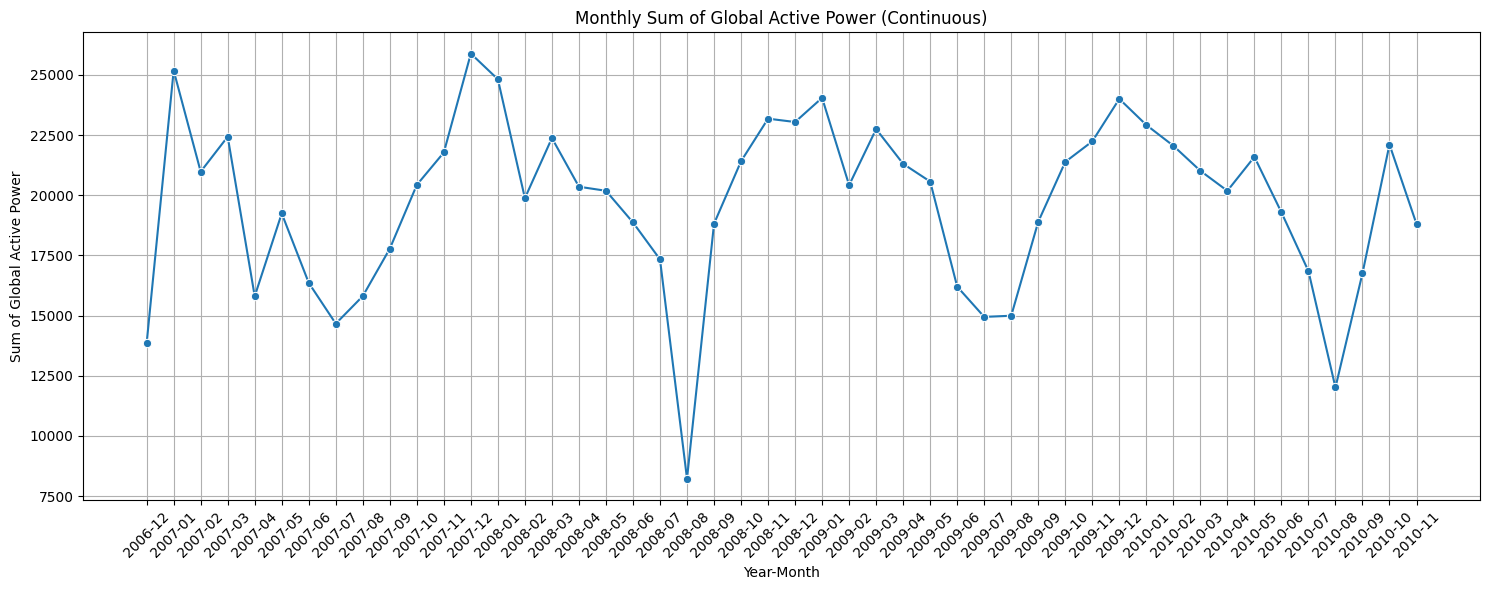

In [59]:
# Group by year and month, sum Global Active Power
monthly_power_sum = df1.groupby(['year', 'month'])['Global_active_power'].sum().reset_index()
monthly_power_sum = monthly_power_sum.sort_values(['year', 'month'])

# Create a continuous year-month label for the x-axis
monthly_power_sum['year_month'] = monthly_power_sum['year'].astype(str) + '-' + monthly_power_sum['month'].astype(str).str.zfill(2)

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_power_sum, x='year_month', y='Global_active_power', marker='o')
plt.title('Monthly Sum of Global Active Power (Continuous)')
plt.xlabel('Year-Month')
plt.ylabel('Sum of Global Active Power')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# Since data is per minute, 60*24 = 1440 rows per day, so sample every 1440th row for daily sampling
sampled_df1 = df1.iloc[::1440, :]

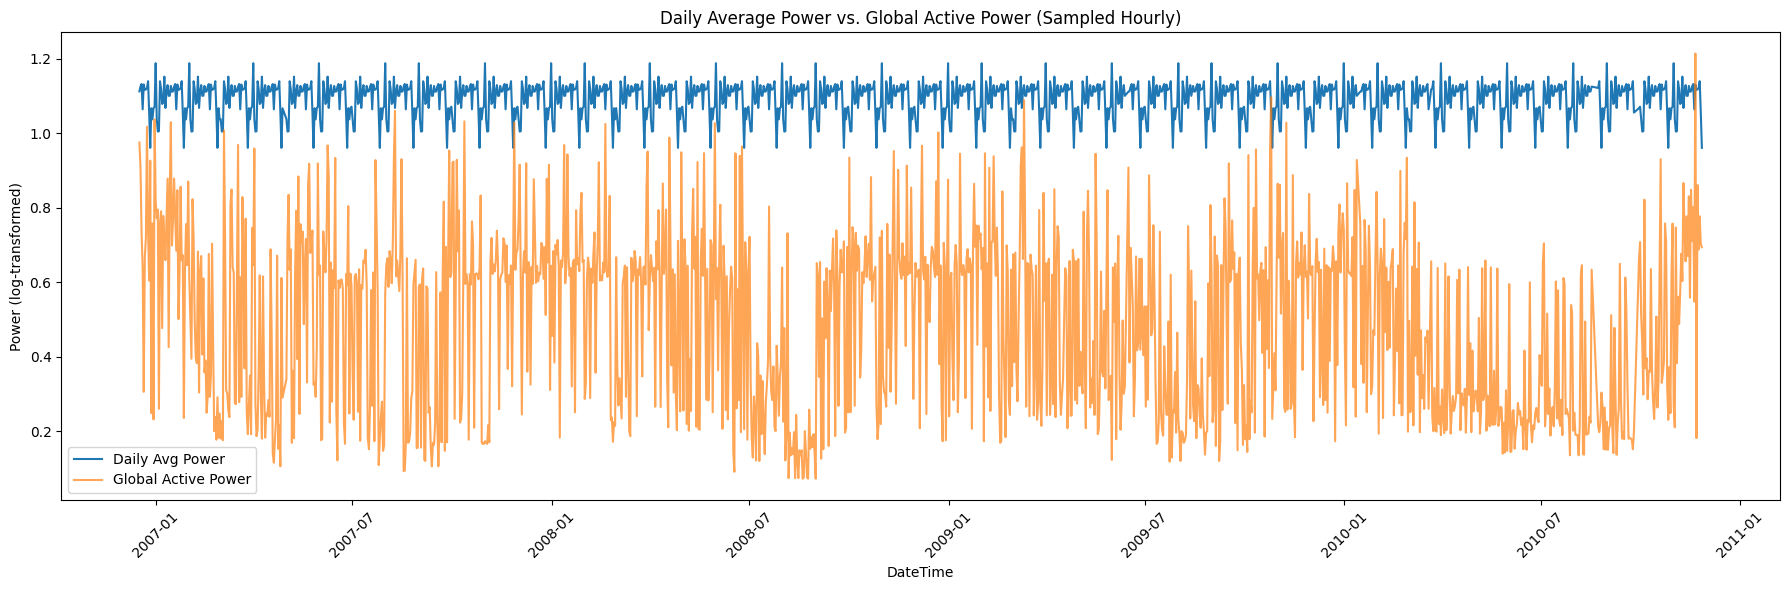

In [61]:
plt.figure(figsize=(18, 6))
plt.plot(sampled_df1['DateTime'], sampled_df1['daily_avg_power'], label='Daily Avg Power', color='tab:blue')
plt.plot(sampled_df1['DateTime'], sampled_df1['Global_active_power'], label='Global Active Power', color='tab:orange', alpha=0.7)
plt.xlabel('DateTime')
plt.ylabel('Power (log-transformed)')
plt.title('Daily Average Power vs. Global Active Power (Sampled Hourly)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

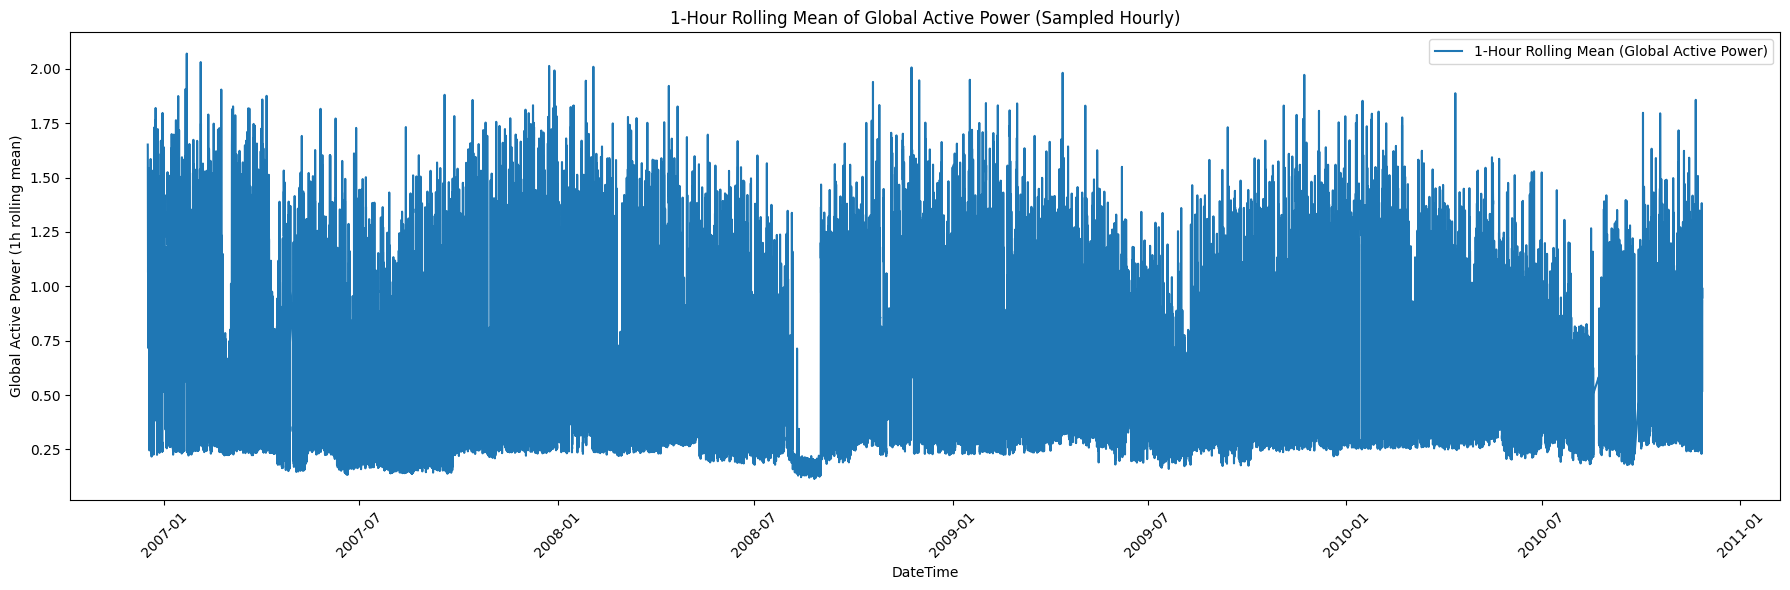

In [62]:
# Sample the data to reduce the number of points (e.g., every 60th row for hourly sampling)
sampled_df = df1.iloc[::60, :]

plt.figure(figsize=(18, 6))
plt.plot(sampled_df['DateTime'], sampled_df['rolling_1h'], label='1-Hour Rolling Mean (Global Active Power)')
plt.xlabel('DateTime')
plt.ylabel('Global Active Power (1h rolling mean)')
plt.title('1-Hour Rolling Mean of Global Active Power (Sampled Hourly)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data split & Modeling


In [63]:
df1.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'DateTime', 'hour', 'day', 'weekday', 'month',
       'Total_sub_metering', 'daily_avg_power', 'rolling_1h', 'rolling_3h',
       'year'],
      dtype='object')

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [65]:
# data splitting &  defining features and target variable

features = ["hour", "weekday", "Voltage", "Total_sub_metering", "daily_avg_power"]
target = "Global_active_power"

X = df1[features]
y = df1[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [67]:
# random forest regression
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [68]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=20, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=20, random_state=42)

## Model Evaluation

In [69]:
# Predict on test set
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Evaluation metrics function
def evaluate_model(y_true, y_pred, model_name):
	rmse = np.sqrt(mean_squared_error(y_true, y_pred))
	mae = mean_absolute_error(y_true, y_pred)
	r2 = r2_score(y_true, y_pred)
	print(f"{model_name} Evaluation:")
	print(f"  RMSE: {rmse:.4f}")
	print(f"  MAE: {mae:.4f}")
	print(f"  R^2: {r2:.4f}\n")

# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

Linear Regression Evaluation:
  RMSE: 0.1536
  MAE: 0.1169
  R^2: 0.6242

Random Forest Evaluation:
  RMSE: 0.0978
  MAE: 0.0602
  R^2: 0.8478

Gradient Boosting Evaluation:
  RMSE: 0.1254
  MAE: 0.0909
  R^2: 0.7496



Text(0.5, 1.0, 'Random Forest Predictions vs Actual Values')

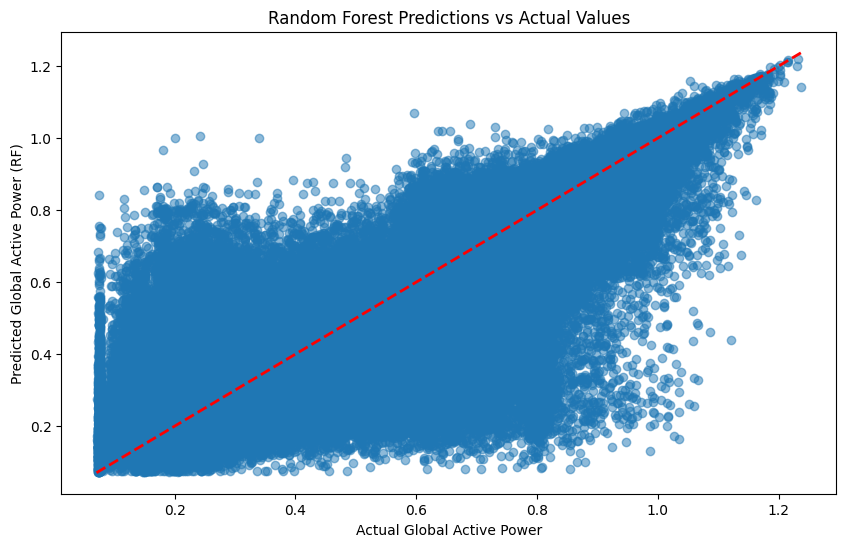

In [70]:
# from Eveluation metrics, we can see that Random froest is best model.
# Plotting predictions vs actual values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power (RF)')
plt.title('Random Forest Predictions vs Actual Values')

In [80]:
# Save the trained Random Forest model to a file in the specified folder
model_save_path = os.path.join(save_dir, "random_forest_model.pkl")
with open(model_save_path, "wb") as f:
	pickle.dump(rf_model, f)

print(f"Random Forest model saved to {model_save_path}")

Random Forest model saved to pkl_batches\random_forest_model.pkl


# Define batch size
batch_size = 200000
num_batches = len(df) // batch_size + 1

# Define the directory to save batches
save_dir = r"pkl_batches"
os.makedirs(save_dir, exist_ok=True)

# Save each batch
for i in range(num_batches):
    batch = df[i*batch_size:(i+1)*batch_size]
    batch_path = os.path.join(save_dir, f"data_batch_{i}.pkl")
    with open(batch_path, "wb") as f:
        pickle.dump(batch, f)

print (f"Prediction ML model(.pkl) splited batch wise & saveed in {num_batches} batches to {save_dir} location")

pip install streamlit